# Iris Flower Species Classification

**A Comparative Analysis of Machine Learning Models for Iris Flower Species Classification**

## Objective
The primary objective of this project is to build and evaluate a machine learning model that can accurately classify the species of Iris flowers. Using a supervised learning approach, we will train an algorithm on a dataset of flower measurements to predict one of three possible species: Setosa, Versicolor, or Virginica. This project serves as a practical demonstration of fundamental machine learning concepts, including data exploration, model selection, and performance evaluation.


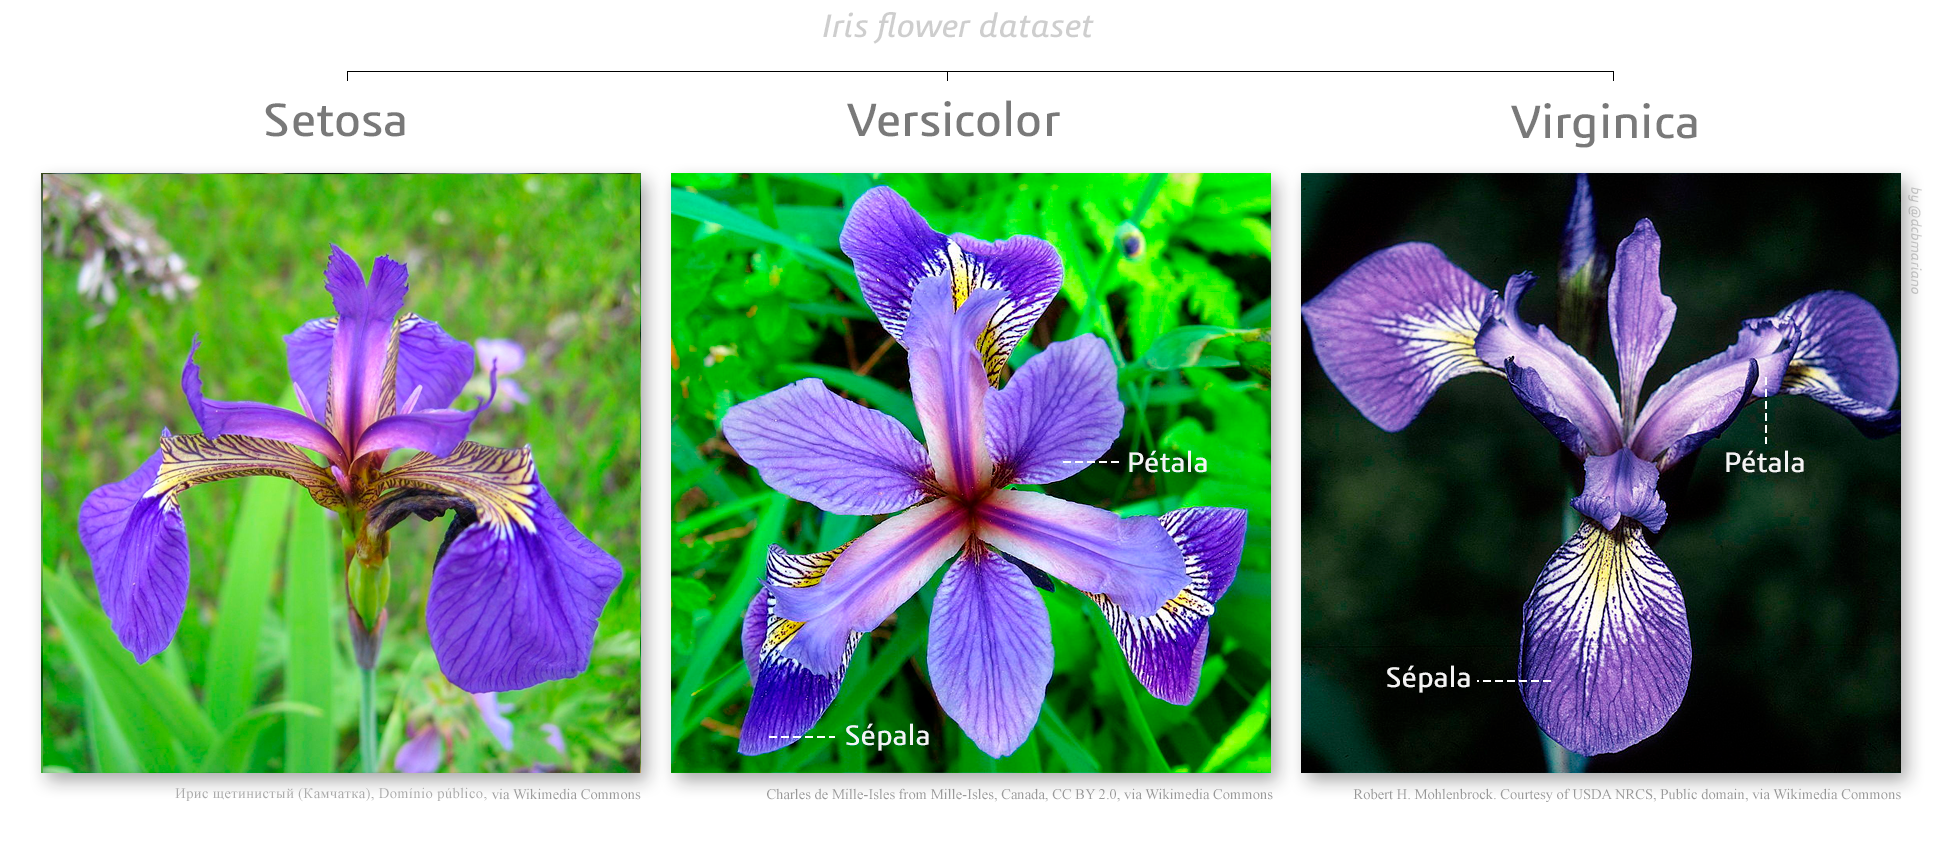

## Descrpition

This project utilizes the Iris dataset, a classic and foundational resource in the field of machine learning. The dataset contains 150 samples of Iris flowers, with an equal distribution of 50 samples for each of the three species. For each flower, there are four key features:

+ Sepal Length: The length of the sepal in centimeters.

+ Sepal Width: The width of the sepal in centimeters.

+ Petal Length: The length of the petal in centimeters.

+ Petal Width: The width of the petal in centimeters.

These four continuous, numerical features will be used as input to our model to predict the discrete species label. The simplicity and balanced nature of this dataset make it an ideal starting point for exploring and showcasing core machine learning algorithms.

## Exploratory Data Analysis (EDA)

Before building any models, it’s essential to understand the data's characteristics. This phase helps us identify patterns, relationships, and potential issues. We'll start by displaying the basic statistics of the dataset.



> importing necessary libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Head and Summary Statistics

In [ ]:
df = pd.read_csv('IRIS.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualizing Feature Distributions and Relationships

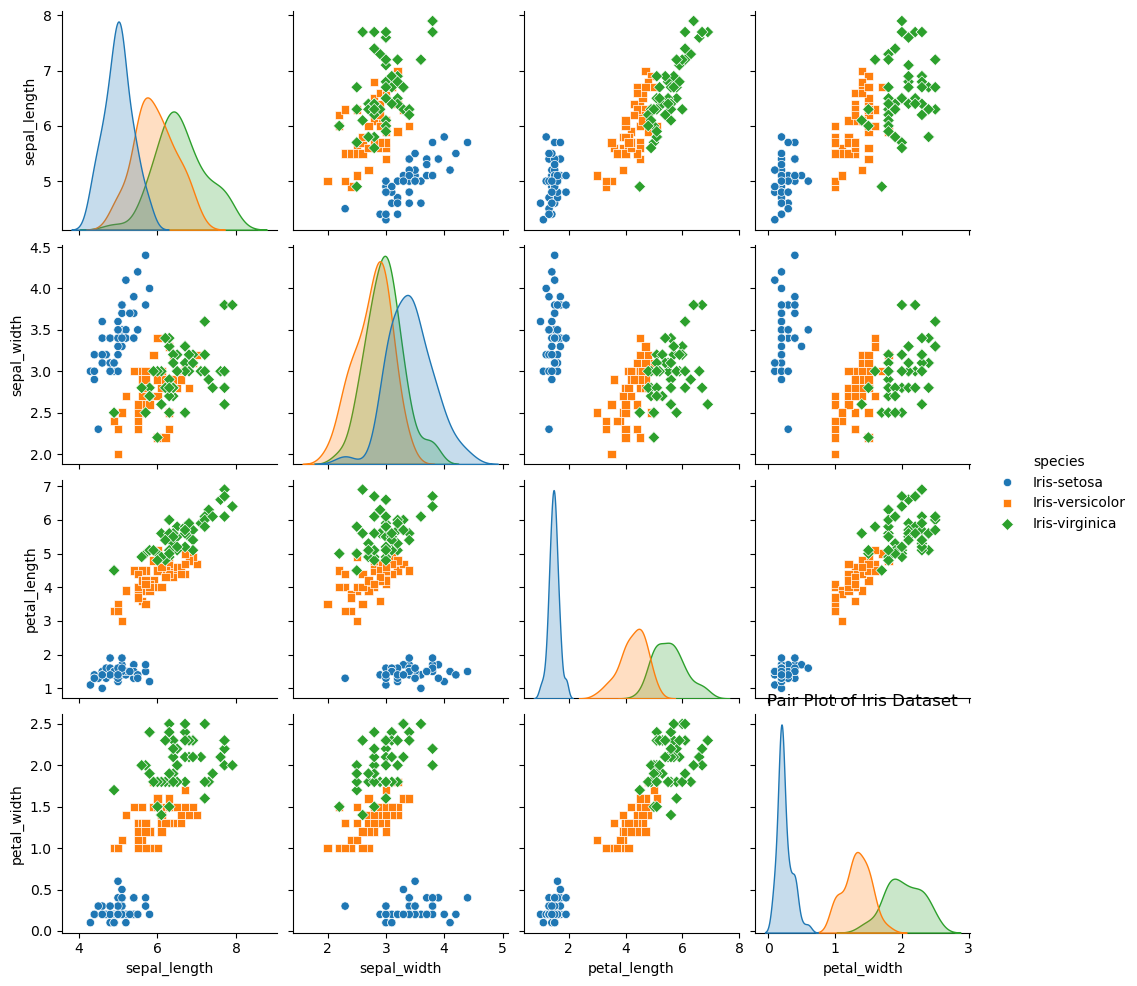

In [ ]:
sns.pairplot(df, hue='species', markers=['o', 's', 'D'])
plt.title('Pair Plot of Iris Dataset')
plt.show()

In [ ]:
df_long = pd.melt(df, id_vars=['species'], value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                  var_name='measurement_type', value_name='value')

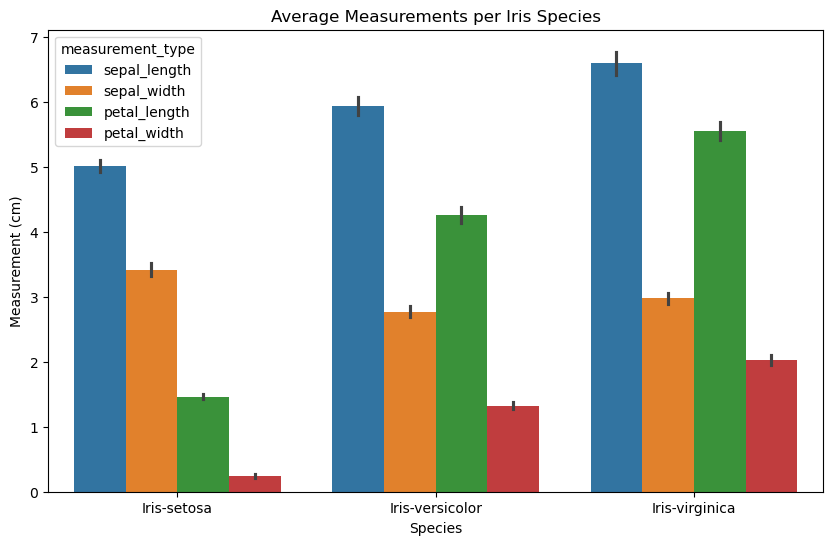

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='species', y='value', hue='measurement_type', data=df_long)
plt.title('Average Measurements per Iris Species')
plt.ylabel('Measurement (cm)')
plt.xlabel('Species')
plt.show()

### Model Training and Evaluation

> Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
x = df.drop(['species'],axis=1)
y = df.species

In [ ]:
LE = LabelEncoder()
y = LE.fit_transform(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

> Model Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

> Model Evalution

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

0.98

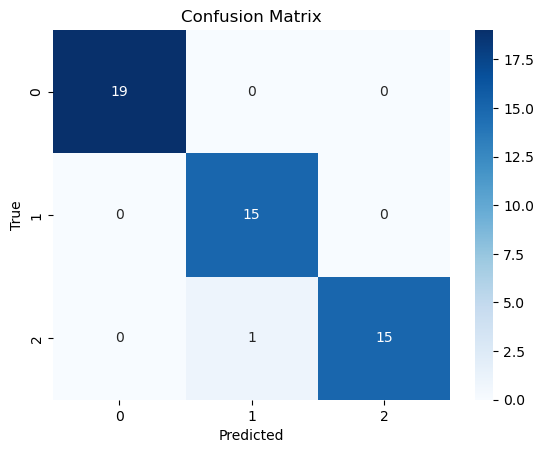

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Conclusion

The KNN model achieved a high accuracy of 98% on the test set, demonstrating its effectiveness in classifying the Iris species. This success can be largely attributed to the clear separation of species in the dataset, which we observed during the EDA phase.

#### Key Insights:

* Petal length and petal width are the most informative features for distinguishing between the species.

* The Setosa species is the easiest to classify, as its measurements are distinct from the other two.